In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
!pip install emoji

In [134]:
import csv
import numpy as np
import emoji
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd



## Data Preprocessing and Analysis

In [135]:
#code used to convert txt to csv
def txt_to_csv(file_name):
# Open the text file in read mode
    with open(file_name, 'r') as file:
        # Read the lines from the text file
        lines = file.readlines()

    # Specify the CSV file name
    csv_file_name = 'es_label.csv'  # change here for each file


    # Open the CSV file in write mode
    with open(csv_file_name, 'w') as csv_file:
        # Create a CSV writer
        csv_writer = csv.writer(csv_file)

        # Iterate through the lines and split values based on a delimiter
        for line in lines:

            values = line.strip().split('\t')  # Example: Tab-separated values
            csv_writer.writerow(values)

def main():
    txt_to_csv("trial/us_trial.text")
    # check

#main()

In [136]:
# read English data
X = pd.read_csv("/content/drive/My Drive/Emoji/us_input.csv", header = None,names = ["sentences"])
Y = pd.read_csv("/content/drive/My Drive/Emoji/us_label.csv", header = None,names = ["labels"])

In [137]:
df = pd.concat([X, Y], axis=1)
df # overview of English data: 50000 rows

,sentences,labels
0,A little throwback with my favourite person @ ...,0
1,"""glam on @user yesterday for #kcon makeup usin...",7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2
...,...,...
49995,My #O2otd Love this chain so much and our new ...,1
49996,Met Santa and Olaf @ the North Pole today @ No...,0
49997,New York by Night Strideby #HERElocationNYC......,11
49998,Kisses for the birthday girl! @ Helzberg Diamonds,0


In [138]:
df["labels"].value_counts() # class and their counts

0     10760
1      5279
2      5241
3      2885
4      2517
5      2317
6      2049
7      1894
8      1796
9      1671
10     1544
11     1528
12     1462
14     1377
13     1346
16     1306
18     1286
17     1279
15     1249
19     1214
Name: labels, dtype: int64

In [139]:
# read Spanish data
X_es = pd.read_csv("/content/drive/My Drive/Emoji/es_input.csv", header = None,names = ["sentences"])
Y_es = pd.read_csv("/content/drive/My Drive/Emoji/es_label.csv", header = None,names = ["labels"])

In [140]:
df_es = pd.concat([X_es, Y_es], axis=1)
df_es #overview of spanish data: 10000 rows

,sentences,labels
0,"Plaza de Oriente , Madrid .......#madrid #city...",9
1,"Por ser la columna de mi templo, por ser lo me...",0
2,Me gustan las motos! #cheste2016 #nicoabad #el...,2
3,"Sevilla tiene un color especial, Sevilla tiene...",16
4,Que (la) Chipi no se caiga .Cuánto os quiero c...,1
...,...,...
9995,Los más elegantes y no hay más que hablar @ Be...,2
9996,Luis Alberto de Cuenca.#poesía de la buena; #C...,11
9997,La nueva #cremareafirmante de carmennavarroest...,17
9998,Me enamoré de la manera en que me tocabas sin ...,15


In [141]:
df_es["labels"].value_counts()

0     2028
1     1363
2      970
3      705
4      645
5      415
7      386
9      369
6      367
8      320
12     313
14     282
13     281
11     271
10     267
16     262
17     260
18     252
15     244
Name: labels, dtype: int64

In [142]:
# with language specified, convert emoji to their class label
def label_to_emoji(label,language):
  if language == "english":
    with open("/content/drive/My Drive/Emoji/mapping/us_mapping.txt", 'r', encoding='utf-8') as file:
      emoji_dict = {int(line.split('\t')[0]): line.split('\t')[1] for line in file}
  elif language == "spanish":
      with open("/content/drive/My Drive/Emoji/mapping/es_mapping.txt", 'r', encoding='utf-8') as file:
        emoji_dict = {int(line.split('\t')[0]): line.split('\t')[1] for line in file}
  return emoji_dict[label]

In [143]:
# checking if label_to_emoji works as expected
index = 9
print(df.loc[index, 'sentences'],label_to_emoji(index,"english"))

"Birthday Kisses @ Madison, Wisconsin" 😘


In [144]:
index = 9
print(df_es.loc[index, 'sentences'],label_to_emoji(index,"spanish"))

Cerrando el Ayuntamiento (@ Ayuntamiento de San Sebastián de los Reyes in San Sebastián de los Reyes, Madrid) 🇪🇸


    Class  Count Emoji  Proportion
0       0  10760     ❤     0.21520
1       1   5279     😍     0.10558
2       2   5241     😂     0.10482
3       3   2885     💕     0.05770
4       4   2517     🔥     0.05034
5       5   2317     😊     0.04634
6       6   2049     😎     0.04098
7       7   1894     ✨     0.03788
8       8   1796     💙     0.03592
9       9   1671     😘     0.03342
10     10   1544     📷     0.03088
11     11   1528    🇺🇸     0.03056
12     12   1462     ☀     0.02924
13     14   1377     😉     0.02754
14     13   1346     💜     0.02692
15     16   1306     😁     0.02612
16     18   1286     📸     0.02572
17     17   1279     🎄     0.02558
18     15   1249     💯     0.02498
19     19   1214     😜     0.02428


Text(0, 0.5, 'Count')

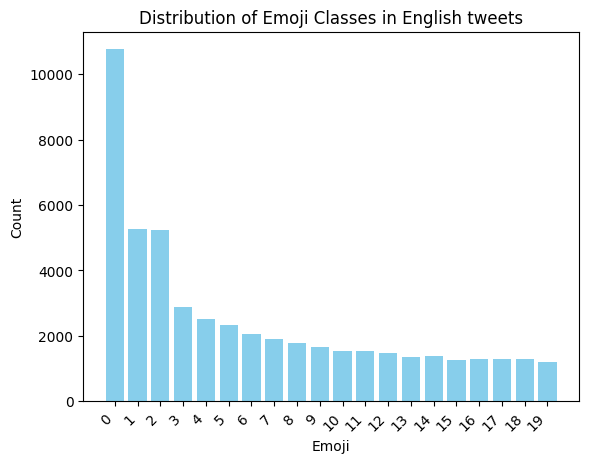

In [145]:
### get the ditribution of English emoji
label_counts = df["labels"].value_counts()
distribution_table = pd.DataFrame(label_counts.reset_index())
distribution_table.columns = ["Class", "Count"]

# Calculate the proportion
distribution_table["Emoji"] = distribution_table["Class"].apply(lambda label: label_to_emoji(label, "english"))
distribution_table["Proportion"] = distribution_table["Count"] / distribution_table["Count"].sum()
# Display the distribution table
print(distribution_table)

plt.bar(distribution_table["Class"], distribution_table["Count"], color='skyblue')
# Set the title and labels
plt.title('Distribution of Emoji Classes in English tweets')
plt.xticks(distribution_table["Class"], rotation=45, ha="right")
plt.xlabel('Emoji')
plt.ylabel('Count')

    Class  Count Emoji  Proportion
0       0   2028     ❤      0.2028
1       1   1363     😍      0.1363
2       2    970     😂      0.0970
3       3    705     💕      0.0705
4       4    645     😊      0.0645
5       5    415     😘      0.0415
6       7    386     😉      0.0386
7       9    369    🇪🇸      0.0369
8       6    367     💪      0.0367
9       8    320     👌      0.0320
10     12    313     💜      0.0313
11     14    282     💞      0.0282
12     13    281     😜      0.0281
13     11    271     💙      0.0271
14     10    267     😎      0.0267
15     16    262     🎶      0.0262
16     17    260     💘      0.0260
17     18    252     😁      0.0252
18     15    244     ✨      0.0244


Text(0, 0.5, 'Count')

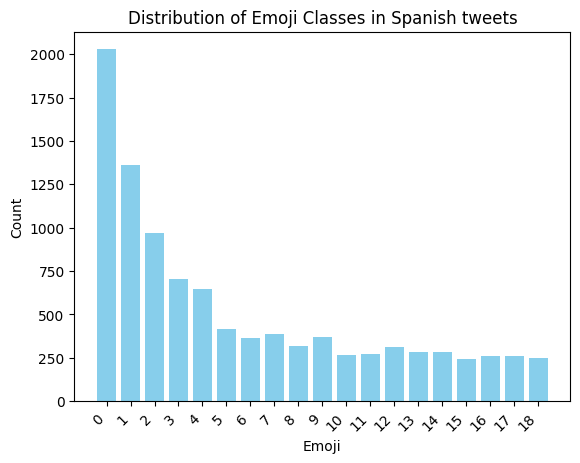

In [146]:
### get the ditribution of Spanish emoji
label_counts = df_es["labels"].value_counts()
distribution_table = pd.DataFrame(label_counts.reset_index())
distribution_table.columns = ["Class", "Count"]

# Calculate the proportion
distribution_table["Emoji"] = distribution_table["Class"].apply(lambda label: label_to_emoji(label, "spanish"))
distribution_table["Proportion"] = distribution_table["Count"] / distribution_table["Count"].sum()
# Display the distribution table
print(distribution_table)

plt.bar(distribution_table["Class"], distribution_table["Count"], color='skyblue')
# Set the title and labels
plt.title('Distribution of Emoji Classes in Spanish tweets')
plt.xticks(distribution_table["Class"], rotation=45, ha="right")

plt.xlabel('Emoji')
plt.ylabel('Count')

In [147]:
# clearn tweets data
def remove_specials(string_list):
    # Define a translation table to remove special characters
    translation_table = str.maketrans('', '', '@#$%^&*()_-+=<>,./:;"\'{}[]|`~')

    # Use translate to remove special characters from each string in the list
    cleaned_list = [s.translate(translation_table) for s in string_list]

    return cleaned_list


X = np.asarray(remove_specials(df["sentences"].tolist()))
X_es = np.asarray(remove_specials(df_es["sentences"].tolist()))
X_es

array(['Plaza de Oriente  Madrid madrid city plazadeoriente puertadesol tour…',
       'Por ser la columna de mi templo por ser lo mejor que tengo  Parquesur',
       'Me gustan las motos! cheste2016 nicoabad elañoquevienemás user',
       ...,
       'La nueva cremareafirmante de carmennavarroestetica  sencillamente maravillosa Su activo…',
       'Me enamoré de la manera en que me tocabas sin utilizar tus manos user',
       'Regalos que te hace tu madre de vuelta a casa que hace que la ame aún más  Villarrobledo'],
      dtype='<U136')

In [148]:
X

array(['A little throwback with my favourite person  Water Wall',
       'glam on user yesterday for kcon makeup using user in featherette…',
       'Democracy Plaza in the wake of a stunning outcome Decision2016  NBC News',
       ...,
       'New York by Night Strideby HERElocationNYC seemycity guardiancities…',
       'Kisses for the birthday girl!  Helzberg Diamonds',
       'Dinner with this priceless view!Thank you S anniversarydinner columbuscircle august23rd…'],
      dtype='<U139')

In [149]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1234)
X_train_es, X_test_es, Y_train_es, Y_test_es = train_test_split(X_es,Y_es,test_size = 0.3, random_state = 1234)

In [150]:
len(X_train)

35000

In [151]:
len(X_train_es)

7000

In [152]:
# get the list of classes
Y_labels = Y_train.values
#
type(Y_labels)

Y_labels_es = Y_train_es.values

In [153]:
# one hot encoding get our labels into a format suitable for training a softmax classifier
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [154]:
#test the function
Y_oh_train = convert_to_one_hot(Y_labels, C = 20)
Y_oh_train


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Baseline Modle

## Glove Embedding




In [155]:
#create glove embedding
def read_glove_vecs(glove_file):
    with open(glove_file, 'r',encoding='utf-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)

        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map


In [156]:
word_to_index, index_to_words, word_to_vec_map = read_glove_vecs("/content/drive/My Drive/Emoji/glove.6B.50d.txt")

In [157]:
### check read_glove_vecs
word = "arena" #spanish
index = 289846
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(index) + "th word in the vocabulary is", index_to_words[index])

the index of arena in the vocabulary is 59030
the 289846th word in the vocabulary is potatos


## Average the vectors

In [158]:
# average the vectors of words
def sentence_to_avg(sentence, word_to_vec_map):
    words = sentence.lower().split()
    avg = np.zeros(50,) # we are using 50d glove
    for w in words:
      if w in word_to_vec_map:
        avg += word_to_vec_map[w]
    avg = np.divide(avg, len(words) if len(words) != 0 else 1)  # Avoid division by zero


    return avg

In [159]:
# check if correct
avg = sentence_to_avg("Morrocan couscous is my favorite dish", word_to_vec_map)
print("avg = ", avg)

avg =  [-0.008005    0.56370833 -0.50427333  0.258865    0.55131103  0.03104983
 -0.21013718  0.16893933 -0.09590267  0.141784   -0.15708967  0.18525867
  0.6495785   0.38371117  0.21102167  0.11301667  0.02613967  0.26037767
  0.05820667 -0.01578167 -0.12078833 -0.02471267  0.4128455   0.5152061
  0.38756167 -0.898661   -0.535145    0.33501167  0.68806933 -0.2156265
  1.797155    0.10476933 -0.36775333  0.750785    0.10282583  0.348925
 -0.27262833  0.66768    -0.10706167 -0.283635    0.59580117  0.28747333
 -0.3366635   0.23393817  0.34349183  0.178405    0.1166155  -0.076433
  0.1445417   0.09808667]


In [160]:
avg = sentence_to_avg("Si no sabes explicarlo es porque merece la pena", word_to_vec_map)
print("avg = ", avg)

avg =  [ 0.10776556  0.52304267 -0.29983011  0.46476333 -0.48791578 -0.34248667
  0.20874111 -0.24642276 -0.56905667  0.42724789 -0.00923933  0.10713622
 -0.12875689 -0.33490556  0.16785241 -0.46787056 -0.141396    0.16908556
  0.33257033  0.18206267 -0.74755889  0.07346444  0.03012889 -0.09784933
  0.10277844 -0.23934222 -0.48285     0.43541889  0.54816956 -0.42833367
  0.97089444 -0.07536244 -0.47807989  0.39148    -0.09978456 -0.47255311
  0.53525889 -0.25252312  0.29166111  0.53998633  0.06478722 -0.16280766
  0.38045556 -0.45172    -0.13848044 -0.69556556 -0.31974367 -0.00706556
  0.77000111  0.86839556]


## Build the model layers

In [161]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


In [162]:
def model(X, Y, word_to_vec_map, learning_rate=0.01, num_iterations=1000):
    """
    return：
        pred -- dim(m, 1)。
        W -- dim(n_y, n_h)。
        b -- dim(n_y,)
    """
    np.random.seed(100)


    m = Y.shape[0]
    # we have 20 classes
    n_y =20
    # match with the pretrained word embedding vector dimension 50
    n_h = 50


    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))

    Y_oh = convert_to_one_hot(Y, C=n_y)


    for t in range(num_iterations):
        for i in range(m):

            avg = sentence_to_avg(X[i], word_to_vec_map)


            z = np.dot(W, avg) + b
            a = softmax(z)

            cost = -np.sum(Y_oh[i]*np.log(a))

            # gradient
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz

            # update params
            W = W - learning_rate * dW
            b = b - learning_rate * db
        if t % 100 == 0:
            print("Epoch {t}，loss is {cost}".format(t=t,cost=cost))
            pred = predict(X, Y, W, b, word_to_vec_map)

    return pred, W, b


In [163]:
def predict(X, Y, W, b, word_to_vec_map):
    """
    arguments:
    X -- input data containing sentences, numpy array of shape (m, None)
    Y -- labels, containing index of the label emoji, numpy array of shape (m, 1)

    returns:
    pred -- numpy array of shape (m, 1) with predictions
    """
    m = X.shape[0]
    pred = np.zeros((m, 1))

    for i in range(m):
        avg = sentence_to_avg(X[i], word_to_vec_map)

        # Forward propagation
        Z = np.dot(W, avg) + b
        A = softmax(Z)
        pred[i] = np.argmax(A)

    print("Accuracy: "  + str(np.mean((pred[:] == Y.reshape(Y.shape[0],1)[:]))))

    return pred

## Small Example

In [164]:
# creating a small example
Y_small = np.asarray([5,0,0,5, 4, 4, 4, 6, 6, 4, 1, 1, 5, 6, 6, 3, 6, 3, 4, 4])
print(Y_small.shape)

X_small = np.asarray(['I am going to the bar tonight', 'I love you', 'miss you my dear',
 'Lets go party and drinks','Congrats on the new job','Congratulations',
 'I am so happy for you', 'Why are you feeling bad', 'What is wrong with you',
 'You totally deserve this prize', 'Let us go play football',
 'Are you down for football this afternoon', 'Work hard play harder',
 'It is suprising how people can be dumb sometimes',
 'I am very disappointed','It is the best day in my life',
 'I think I will end up alone','My life is so boring','Good job',
 'Great so awesome'])


(20,)


In [165]:
pred, W, b = model(X_small, Y_small, word_to_vec_map)
print(pred.T)

Epoch 0，loss is 2.7324261263599503
Accuracy: 0.25
Epoch 100，loss is 0.34871808947094407
Accuracy: 0.95
Epoch 200，loss is 0.1801176936949795
Accuracy: 0.95
Epoch 300，loss is 0.12129523494696368
Accuracy: 1.0
Epoch 400，loss is 0.09137502137990512
Accuracy: 1.0
Epoch 500，loss is 0.0733232598589357
Accuracy: 1.0
Epoch 600，loss is 0.06127997406058603
Accuracy: 1.0
Epoch 700，loss is 0.052681506915353477
Accuracy: 1.0
Epoch 800，loss is 0.046234287760581604
Accuracy: 1.0
Epoch 900，loss is 0.04121816815519117
Accuracy: 1.0
[[5. 0. 0. 5. 4. 4. 4. 6. 6. 4. 1. 1. 5. 6. 6. 3. 6. 3. 4. 4.]]


## Training with English

In [166]:
Y_train

,labels
24515,1
21369,18
7912,0
40811,4
34910,15
...,...
32399,0
17048,2
23924,0
34086,0


In [167]:
Y_train = np.asarray(Y_train["labels"].tolist())
Y_train # convert Y for model

array([ 1, 18,  0, ...,  0,  0,  5])

In [168]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)
print(pred.T)

Epoch 0，loss is 3.3689984287035943
Accuracy: 0.23645714285714287
Epoch 100，loss is 3.413016629277083
Accuracy: 0.24577142857142859
Epoch 200，loss is 3.417383346354753
Accuracy: 0.24605714285714286


KeyboardInterrupt: ignored

## Testing with English

In [ ]:
Y_test = np.asarray(Y_test["labels"].tolist())
Y_test # convert Y for model; if already run once, no need to run teh second time.

In [ ]:
print("=====Training====")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print("=====Test====")
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

In [ ]:
# visualize the result

print(Y_test.shape)
print('           '+ label_to_emoji(0, language="english") + '    ' + label_to_emoji(1, language="english") + '    ' +  label_to_emoji(2, language="english") + '    ' + label_to_emoji(3, language="english") + '   ' + label_to_emoji(4, language="english") + '    ' + label_to_emoji(5, language="english") + '    ' + label_to_emoji(6, language="english") + '    ' + label_to_emoji(7, language="english") + '    ' + label_to_emoji(8, language="english") + '    ' + label_to_emoji(9, language="english") + '    ' + label_to_emoji(10, language="english") + '    ' + label_to_emoji(11, language="english") + '    ' + label_to_emoji(12, language="english") + '    ' + label_to_emoji(13, language="english") + '    ' + label_to_emoji(14, language="english") + '    ' + label_to_emoji(15, language="english") + '    ' + label_to_emoji(16, language="english") + '    ' + label_to_emoji(17, language="english") + '    ' + label_to_emoji(18, language="english") + '    ' + label_to_emoji(19, language="english"))
print(pd.crosstab(Y_test, pred_test.reshape(15000,), rownames=['Actual'], colnames=['Predicted'], margins=True))
# plot_confusion_matrix(Y_test, pred_test)


In [ ]:
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return sns.heatmap(table, fmt='d', cmap='viridis')

plot_confusion_matrix(Y_test, pred_test);

In [ ]:
unique_elements, counts = np.unique(pred_test, return_counts=True)
unique_elements,counts

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(Y_test, pred_test, average='macro')
recall = recall_score(Y_test, pred_test, average='macro')
f1 = f1_score(Y_test, pred_test, average='macro')

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

## Training with Spanish

In [ ]:
Y_train_es = np.asarray(Y_train_es["labels"].tolist())
Y_train_es # convert Y for model

In [ ]:
pred, W, b = model(X_train_es, Y_train_es, word_to_vec_map)
print(pred.T)

## Testing with Spanish

In [ ]:
Y_test_es = np.asarray(Y_test_es["labels"].tolist())
Y_test_es # convert Y for model

In [ ]:
print("=====Training====")
pred_train_es = predict(X_train_es, Y_train_es, W, b, word_to_vec_map)
print("=====Test====")
pred_test_es = predict(X_test_es, Y_test_es, W, b, word_to_vec_map)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(Y_test_es, pred_test, average='macro')
recall = recall_score(Y_test_es, pred_test_es, average='macro')
f1 = f1_score(Y_test_es, pred_test_es, average='macro')

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

## Improving Baseline Model

In [ ]:
!pip install keras

import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

# The input is X (an array of strings representing sentences), which is then transformed into a corresponding list of sentences.
# The output is a list or matrix that can be accepted by the Embedding() function
def sentences_to_indices(X, word_to_index, max_len):

    m = X.shape[0]
    X_indices = np.zeros((m, max_len))

    for i in range(m):

        sentences_words = X[i].lower().split()


        j = 0
        for w in sentences_words:
            if w in word_to_index:
               X_indices[i, j] = word_to_index[w]

            j += 1

    return X_indices

def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    vocab_len = len(word_to_index) + 1
    emb_dim = word_to_vec_map["hi"].shape[0]
    # Initialize the embedding matrix
    emb_matrix = np.zeros((vocab_len, emb_dim))
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]
    # Define the Keras embedding layer
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False)
    embedding_layer.build((None,))
    embedding_layer.set_weights([emb_matrix])

    return embedding_layer


embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
print("weights[0][1][3] =", embedding_layer.get_weights()[0][1][3])

In [ ]:
def new_model(input_shape, word_to_vec_map, word_to_index):
    """

    """
    sentence_indices = Input(input_shape, dtype='int32')

    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)


    embeddings = embedding_layer(sentence_indices)
    X = LSTM(128, return_sequences=True)(embeddings)
    #dropout layer with probability 0.5
    X = Dropout(0.5)(X)
    X = LSTM(128, return_sequences=False)(X)
    #dropout layer
    X = Dropout(0.5)(X)
    X = Dense(20)(X)
    X = Activation('softmax')(X)
    model = Model(inputs=sentence_indices, outputs=X)

    return model


In [ ]:
maxLen = 100
model = new_model((maxLen,), word_to_vec_map, word_to_index)
model.summary()

In [ ]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 20)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

if not working for the first time, run compile again

## Training with English Tweets

In [ ]:
model.fit(X_train_indices, Y_train_oh, epochs = 4, batch_size = 32, shuffle=True)

In [ ]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 20)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)


from sklearn.metrics import classification_report

Y_pred = model.predict_classes(X_test_indices)
Y_true = [np.argmax(y) for y in Y_test_oh]
# get evaluation metrics
print("Classification Report:")
print(classification_report(Y_true, Y_pred))

## Training with Spanish Tweets

In [ ]:
X_train_indices_es = sentences_to_indices(X_train_es, word_to_index, maxLen)
Y_train_oh_es = convert_to_one_hot(Y_train_es, C = 20)

In [ ]:
model.fit(X_train_indices_es, Y_train_oh_es, epochs = 4, batch_size = 32, shuffle=True)

In [ ]:
X_test_indices_es = sentences_to_indices(X_test_es, word_to_index, max_len = maxLen)
Y_test_oh_es = convert_to_one_hot(Y_test_es, C = 5)
loss, acc = model.evaluate(X_test_indices_es, Y_test_oh_es)
print()
print("Test accuracy = ", acc)

from sklearn.metrics import classification_report

Y_pred_es = model.predict_classes(X_test_indices_es)
Y_true_es = [np.argmax(y) for y in Y_test_oh_es]
# get evaluation metrics
print("Classification Report:")
print(classification_report(Y_true_es, Y_pred_es))